In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import soundfile as sf
import sklearn

In [3]:
# load data

y_m, sr_m = librosa.load(
    'c:/nmb/nmb_data/M2_low.wav'
) # 남성 음성

y_f, sr_f = librosa.load(
    'c:/nmb/nmb_data/F1_high.wav'
) # 여성 음성

In [4]:
# mfcc

def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)

mfcc_m = librosa.feature.mfcc(
    y_m, sr = sr_m
) # mfcc 변환
mfcc_m_norm = normalize(mfcc_m, axis = 1)

mfcc_f = librosa.feature.mfcc(
    y_f, sr = sr_f
)
mfcc_f_norm = normalize(mfcc_f, axis = 1)

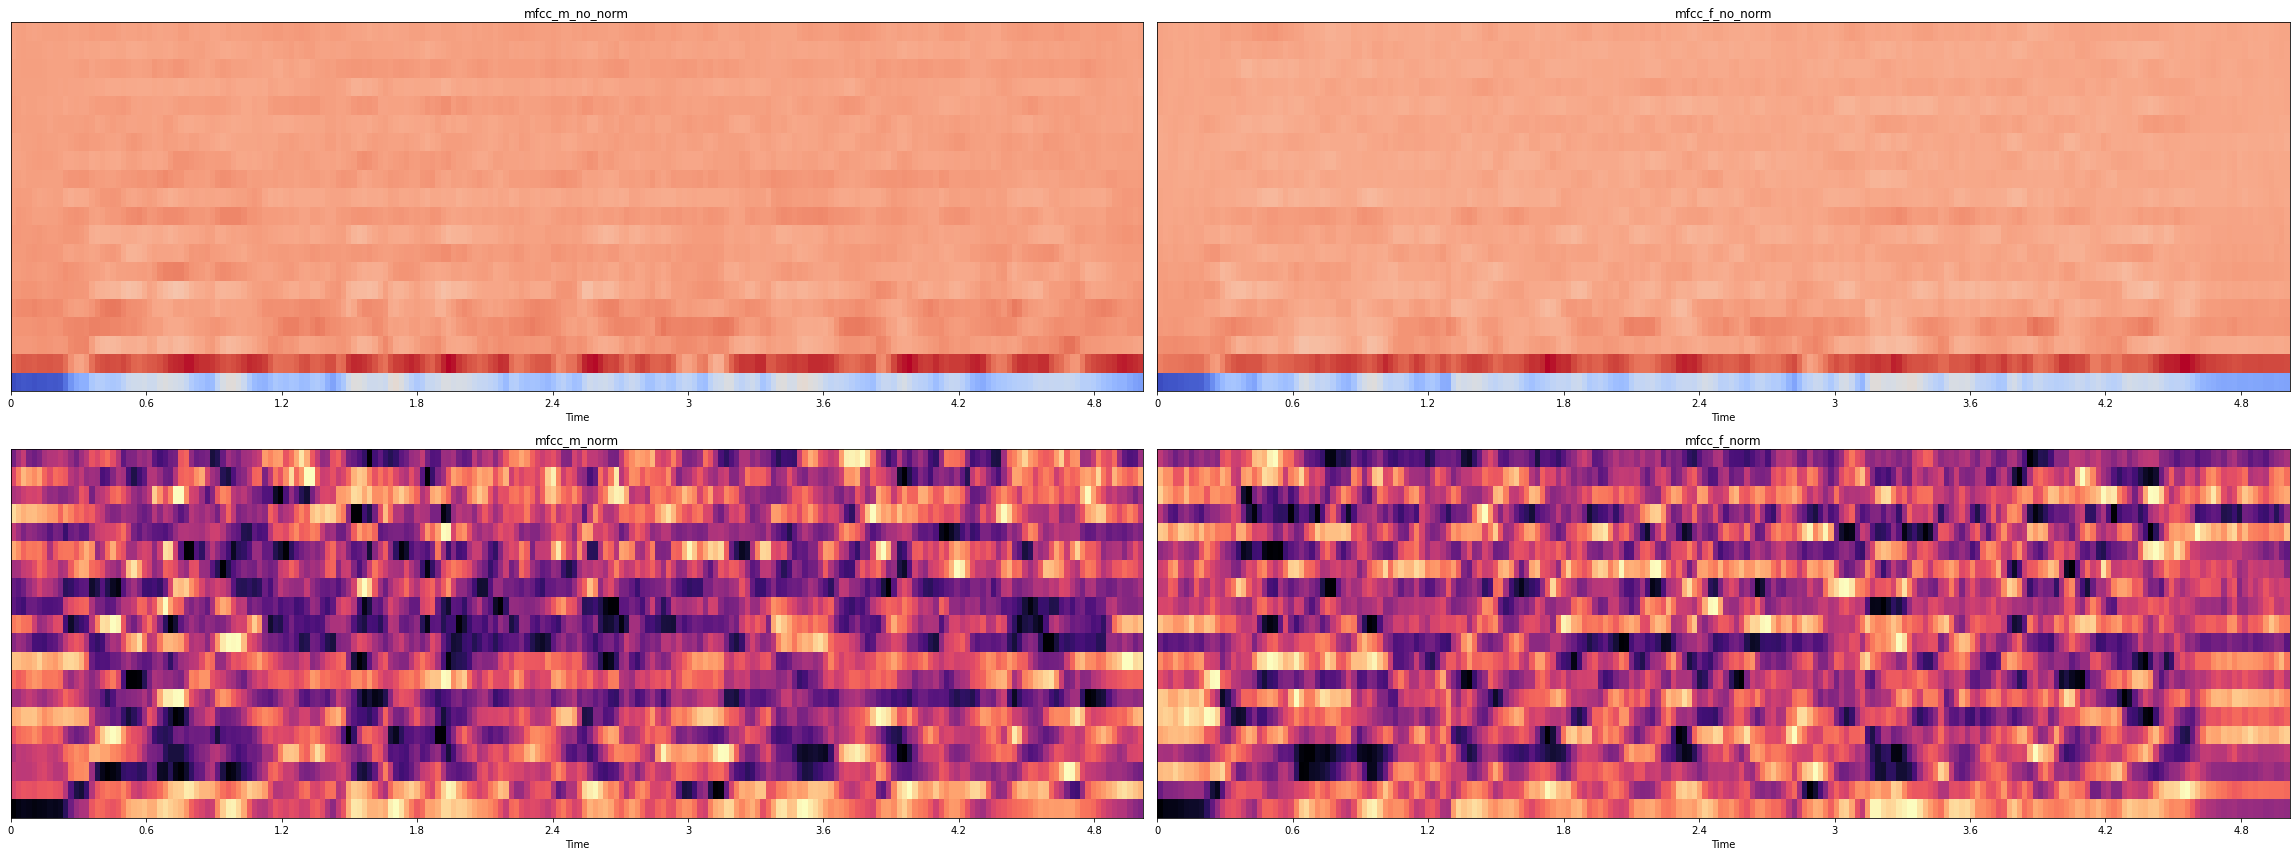

In [5]:
# visualization

fig = plt.figure(figsize = (32, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

librosa.display.specshow(
    mfcc_m, sr = sr_m, x_axis = 'time', ax = ax1
)
ax1.set(title = 'mfcc_m_no_norm')

librosa.display.specshow(
    mfcc_f, sr = sr_f, x_axis = 'time', ax = ax2
)
ax2.set(title = 'mfcc_f_no_norm')

librosa.display.specshow(
    mfcc_m_norm, sr = sr_m, x_axis = 'time', ax = ax3
)
ax3.set(title = 'mfcc_m_norm')

librosa.display.specshow(
    mfcc_f_norm, sr = sr_f, x_axis = 'time', ax = ax4
)
ax4.set(title = 'mfcc_f_norm')

fig.tight_layout()
plt.show()

In [7]:
# mfcc_to_mel

mtm_m = librosa.feature.inverse.mfcc_to_mel(
    mfcc_m_norm,
    n_mels = 128, 
    dct_type = 2, 
    norm = 'ortho', # 'backward', 'ortho', 'forward' 존재
    ref = 1.0, 
    lifter = 0
)

mtm_f = librosa.feature.inverse.mfcc_to_mel(
    mfcc_f_norm,
    n_mels = 128,
    dct_type = 2,
    norm = 'ortho',
    ref = 1.0,
    lifter = 0
)

C:\Users\ai\Anaconda3\envs\tf_cert\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\envs\tf_cert\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\envs\tf_cert\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


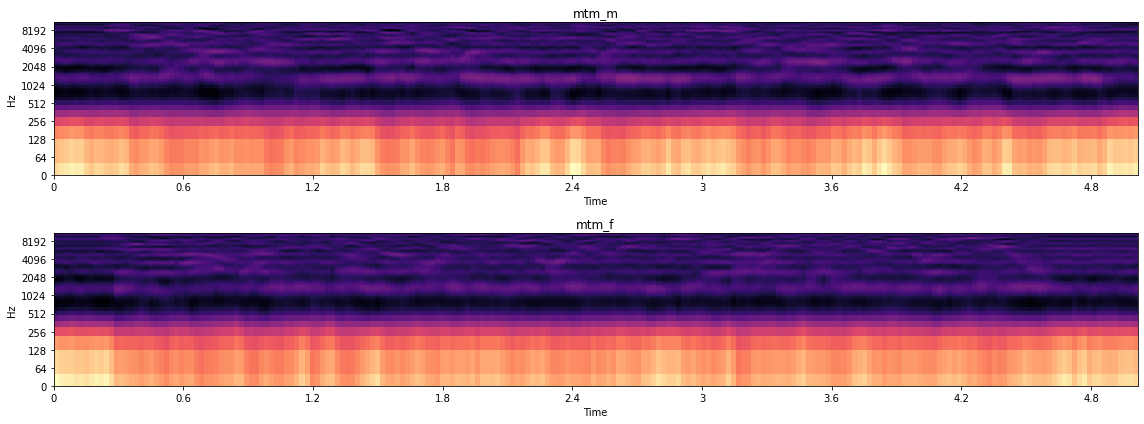

In [8]:
fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

librosa.display.specshow(
    mtm_m, sr = sr_m, x_axis = 'time', y_axis = 'log', ax = ax1
)
ax1.set(title = 'mtm_m')

librosa.display.specshow(
    mtm_f, sr = sr_f, x_axis = 'time', y_axis = 'log', ax = ax2
)
ax2.set(title = 'mtm_f')

fig.tight_layout()
plt.show()

In [17]:
# melspectrogram 과 mfcc_to_mel 과의 비교

S_m = librosa.feature.melspectrogram(
    y_m, sr = sr_m
)
S_m = librosa.amplitude_to_db(
    S_m, ref = np.max
)

S_f = librosa.feature.melspectrogram(
    y_f, sr = sr_f
)
S_f = librosa.amplitude_to_db(
    S_f, ref = np.max
)

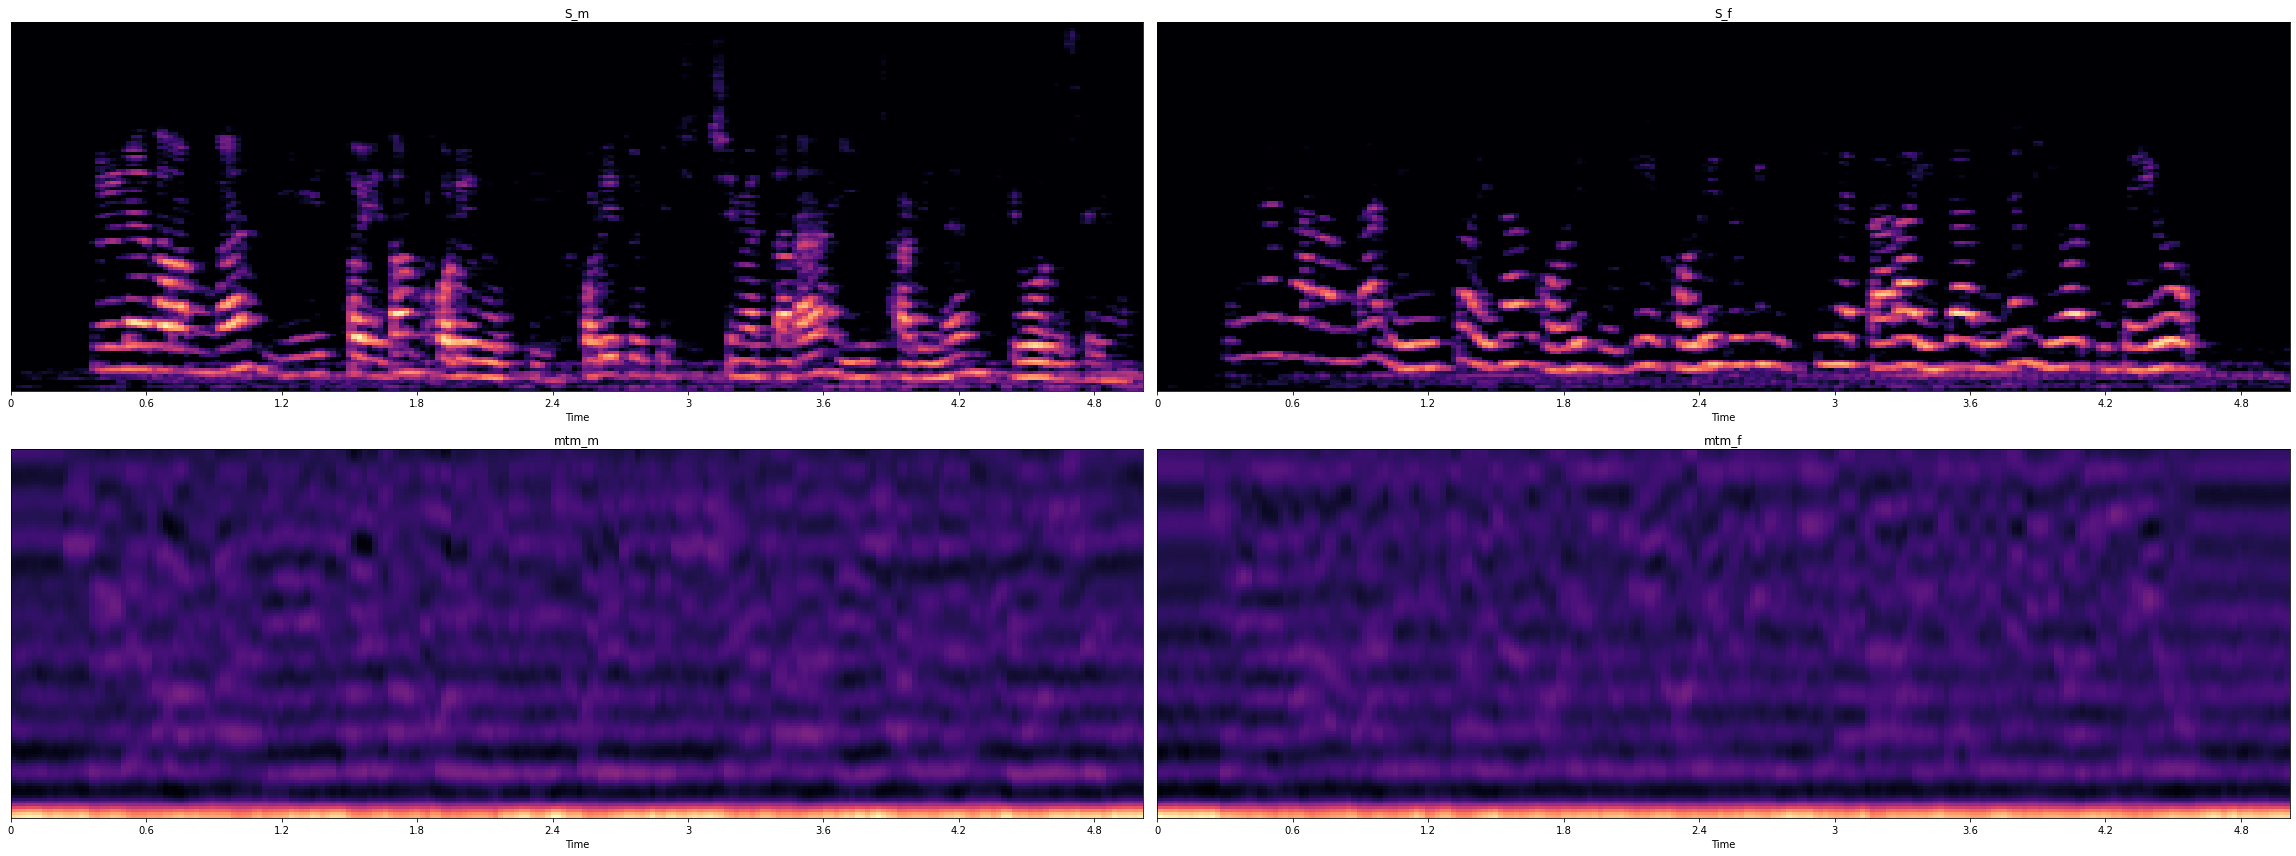

In [18]:
# visualization

fig = plt.figure(figsize = (32, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

librosa.display.specshow(
    S_m, sr = sr_m, x_axis = 'time', ax = ax1
)
ax1.set(title = 'S_m')

librosa.display.specshow(
    S_f, sr = sr_f, x_axis = 'time', ax = ax2
)
ax2.set(title = 'S_f')

librosa.display.specshow(
    mtm_m, sr = sr_m, x_axis = 'time', ax = ax3
)
ax3.set(title = 'mtm_m')

librosa.display.specshow(
    mtm_f, sr = sr_f, x_axis = 'time', ax = ax4
)
ax4.set(title = 'mtm_f')

fig.tight_layout()
plt.show()

In [16]:
# sf.write(
#     'c:/nmb/nmb_data/S_m.wav', S_m, sr_m
# )

In [79]:
# mfcc_to_mel

mtm_m_C = librosa.feature.inverse.mfcc_to_mel(
    mfcc_m_norm,
    n_mels = 128, 
    dct_type = 2, 
    norm = None,
    ref = 1.0, 
    lifter = 0
)

mtm_f_C = librosa.feature.inverse.mfcc_to_mel(
    mfcc_f_norm,
    n_mels = 128,
    dct_type = 2,
    norm = 'forward',
    ref = 1.0,
    lifter = 0
)

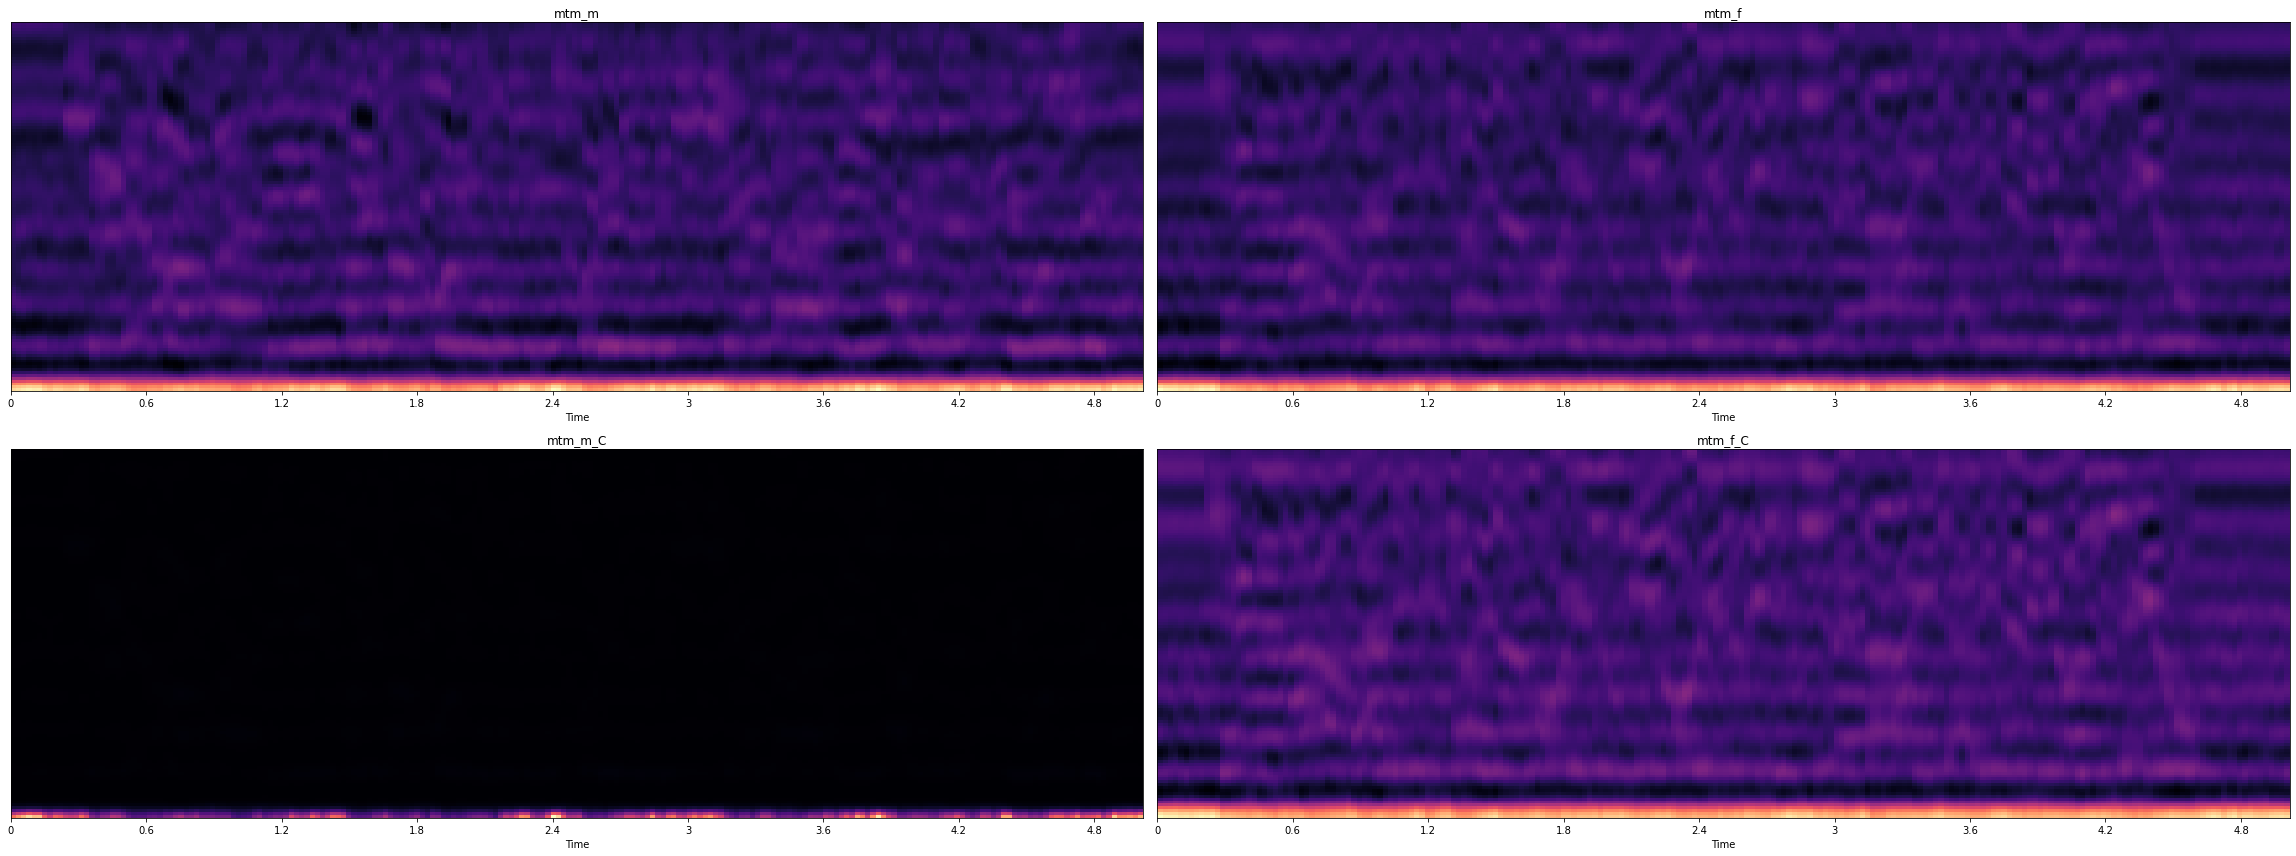

In [80]:
# visualization

fig = plt.figure(figsize = (32, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

librosa.display.specshow(
    mtm_m, sr = sr_m, ax = ax1, x_axis = 'time' 
)
ax1.set(title = 'mtm_m')

librosa.display.specshow(
    mtm_f, sr = sr_f, ax = ax2, x_axis = 'time'
)
ax2.set(title = 'mtm_f')

librosa.display.specshow(
    mtm_m_C, sr = sr_m, ax = ax3, x_axis = 'time'
)
ax3.set(title = 'mtm_m_C')

librosa.display.specshow(
    mtm_f_C, sr = sr_f, ax = ax4, x_axis = 'time'
)
ax4.set(title = 'mtm_f_C')

fig.tight_layout()
plt.show()

In [65]:
print(len(mtm_m))
print(len(mtm_m_C))
print(mtm_m.shape)
print(mtm_m_C.shape)

128
128
(128, 216)
(128, 216)


In [78]:
print(mtm_m)
print(mtm_m_C)

[[1.3629555 1.3721662 1.379856  ... 1.3763559 1.3714296 1.381977 ]
 [1.3318343 1.339768  1.3461545 ... 1.347092  1.3422536 1.3510376]
 [1.2755815 1.2814009 1.2856128 ... 1.2939454 1.2892858 1.2950985]
 ...
 [1.0128558 1.0116576 1.0105189 ... 1.0027173 1.0013388 0.9992603]
 [1.0196745 1.0180658 1.0164214 ... 1.008847  1.0084485 1.0039304]
 [1.0233068 1.0214659 1.0195441 ... 1.012148  1.0122861 1.006404 ]]
[[141.80995    157.44012    171.92392    ... 159.04489    150.80353
  170.87036   ]
 [ 97.994865   107.41938    115.74832    ... 112.76748    106.902626
  118.94129   ]
 [ 49.128273    52.67074     55.43187    ...  59.221973    56.133503
   60.464268  ]
 ...
 [  1.2267661    1.1999013    1.1768141  ...   1.0015755    0.9838581
    0.95391965]
 [  1.3657936    1.3274622    1.2917466  ...   1.1041623    1.1017795
    1.0278076 ]
 [  1.4457529    1.400201     1.3567278  ...   1.1634084    1.1708128
    1.0690842 ]]
